# Detailed Analysis of Meat Consumption in India
This notebook provides a very detailed analysis of meat consumption trends in India.

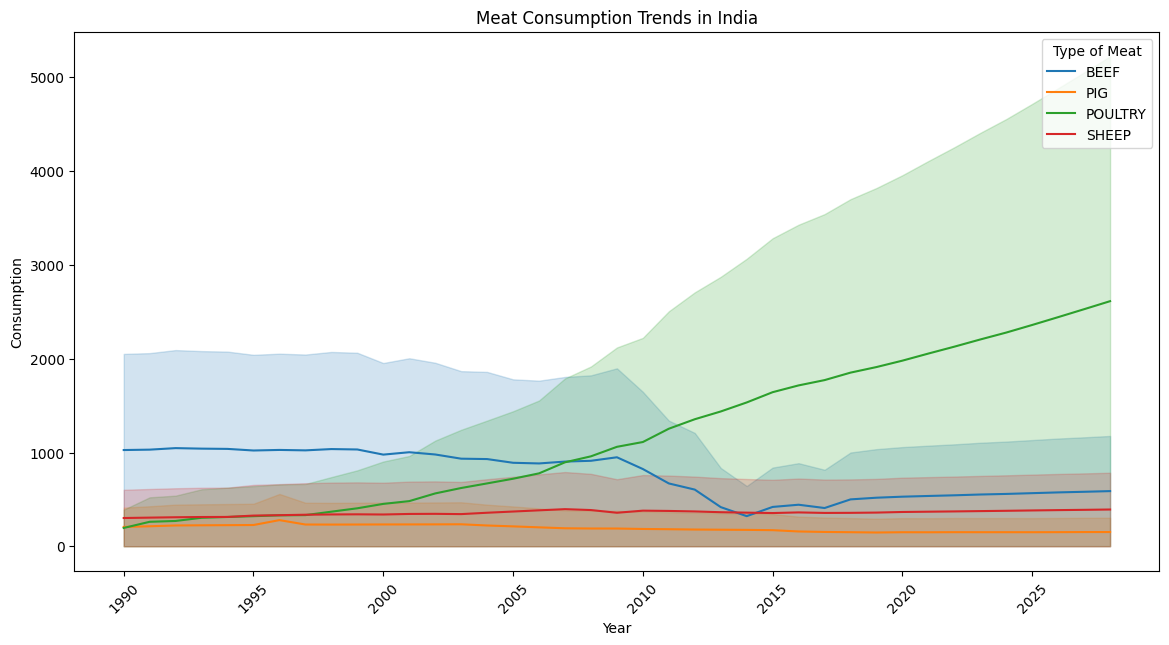

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/world_meat_consumpiton_trends.csv')

# Data Preprocessing
df.dropna(subset=['Value'], inplace=True)
df['TIME'] = pd.to_datetime(df['TIME'], format='%Y')

# Data for India
india_data = df[df['LOCATION'] == 'IND']
india_data.set_index('TIME', inplace=True)

# Meat consumption trends in India plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=india_data, x=india_data.index, y='Value', hue='SUBJECT')
plt.title('Meat Consumption Trends in India')
plt.xlabel('Year')
plt.ylabel('Consumption')
plt.legend(title='Type of Meat')
plt.xticks(rotation=45)
plt.show()

## Detailed Analysis by Meat Type

In [2]:
# List of unique meat types in India
meat_types = india_data['SUBJECT'].unique()
meat_types

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

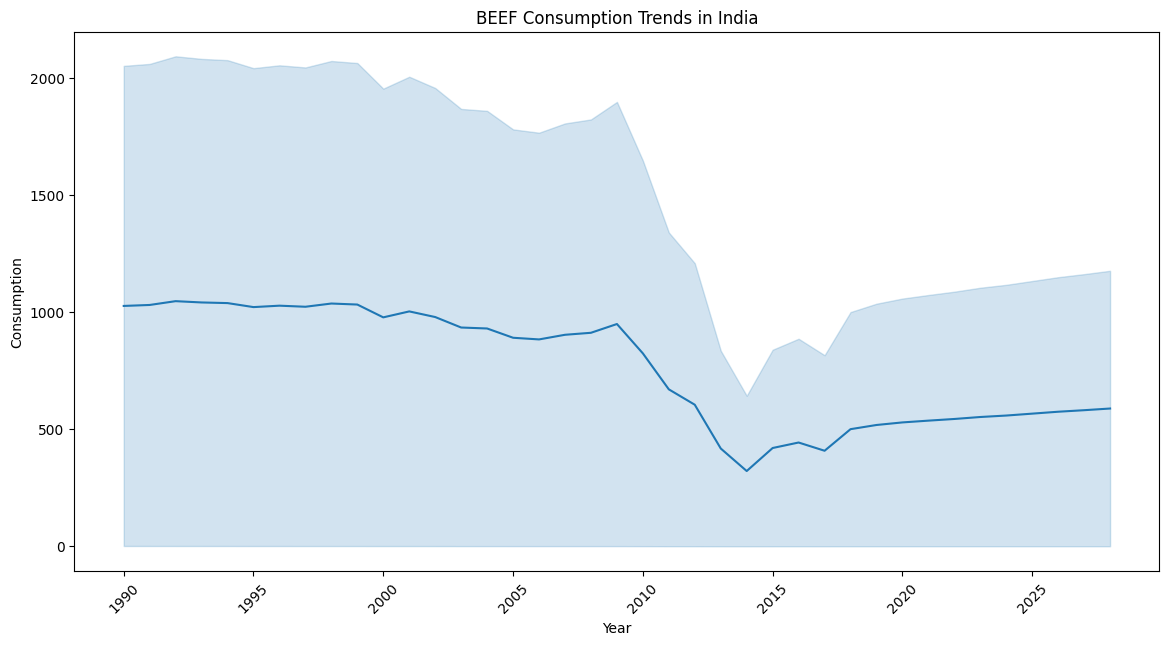

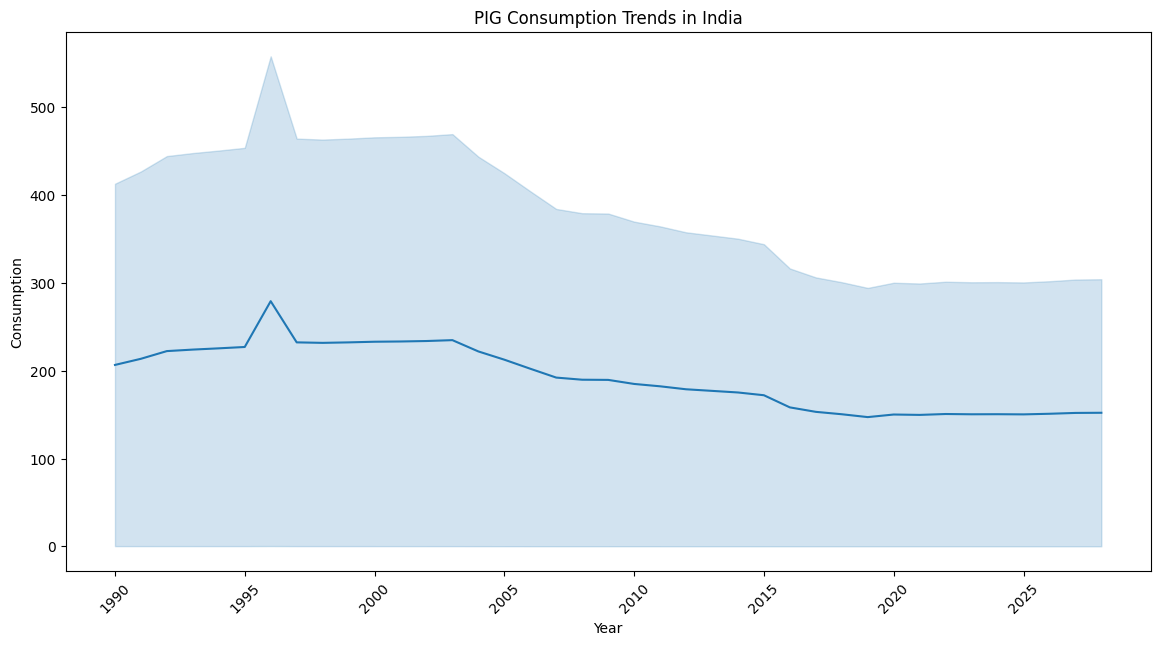

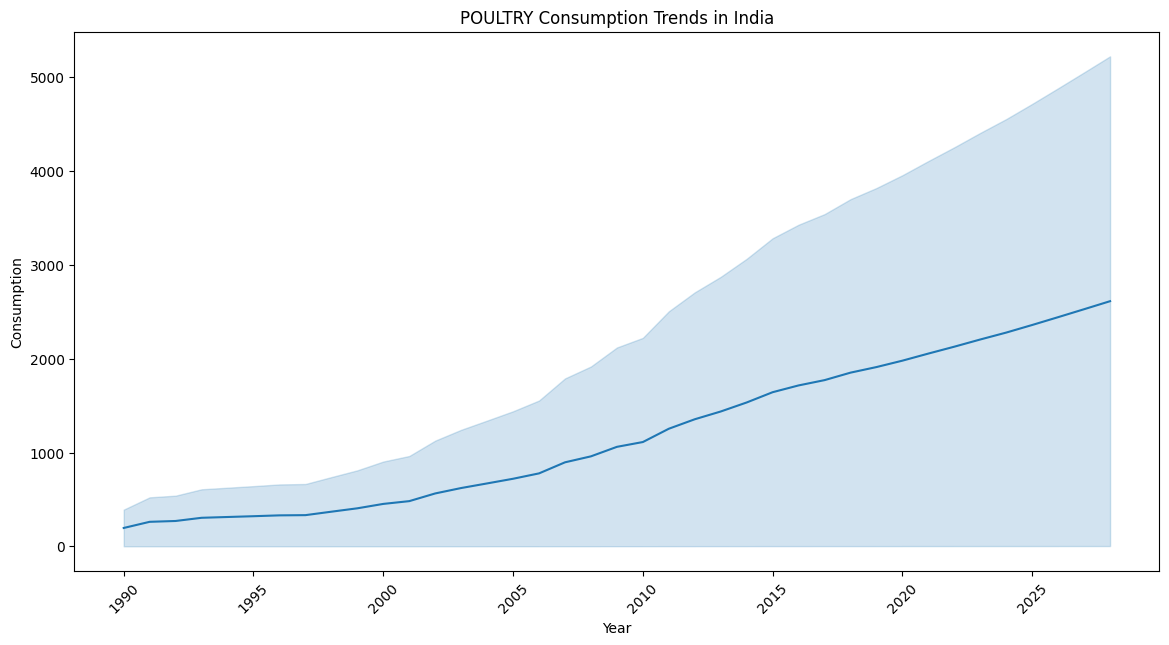

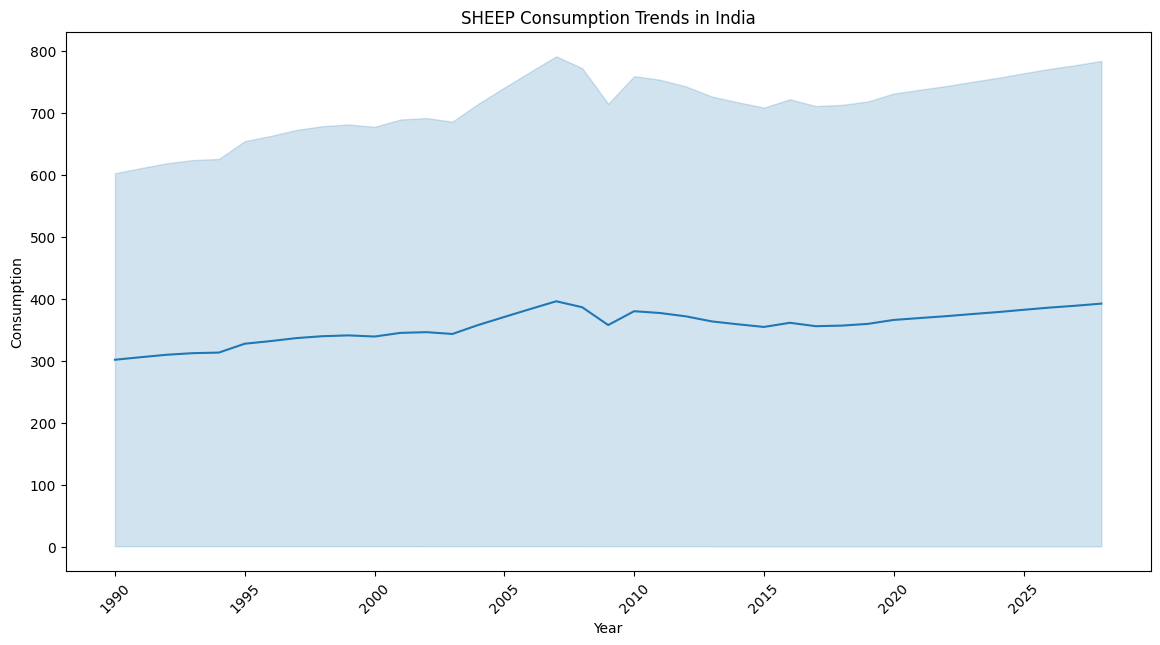

In [3]:
# Meat consumption trends for each type of meat in India plot
for meat in meat_types:
    plt.figure(figsize=(14, 7))
    meat_data = india_data[india_data['SUBJECT'] == meat]
    sns.lineplot(data=meat_data, x=meat_data.index, y='Value')
    plt.title(f'{meat} Consumption Trends in India')
    plt.xlabel('Year')
    plt.ylabel('Consumption')
    plt.xticks(rotation=45)
    plt.show()

## Statistical Analysis

In [4]:
# Example: Mean and standard deviation of meat consumption in India
india_stats = india_data.groupby('SUBJECT')['Value'].agg(['mean', 'std'])
india_stats

,mean,std
SUBJECT,,
BEEF,765.249393,841.491590
PIG,191.737754,199.158581
POULTRY,1191.755131,1630.083815
SHEEP,356.372859,359.925329


## Predictive Modeling for Meat Consumption in India

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Forecast for a meat type in India
def forecast_meat_consumption_india(meat_type):
    meat_data = india_data[india_data['SUBJECT'] == meat_type]
    meat_data = meat_data['Value']
    
    # Historical data plot
    plt.figure(figsize=(14, 7))
    plt.plot(meat_data, label='Historical')
    plt.title(f'{meat_type} Consumption in India')
    plt.xlabel('Year')
    plt.ylabel('Consumption')
    plt.legend()
    plt.show()
    
    # ARIMA model
    model = ARIMA(meat_data, order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=10)
    
    # Forecast plot
    plt.figure(figsize=(14, 7))
    plt.plot(meat_data, label='Historical')
    plt.plot(pd.date_range(start=meat_data.index.max(), periods=10, freq='A'), forecast, label='Forecast')
    plt.title(f'{meat_type} Consumption Forecast in India')
    plt.xlabel('Year')
    plt.ylabel('Consumption')
    plt.legend()
    plt.show()
    
    return model_fit.summary()


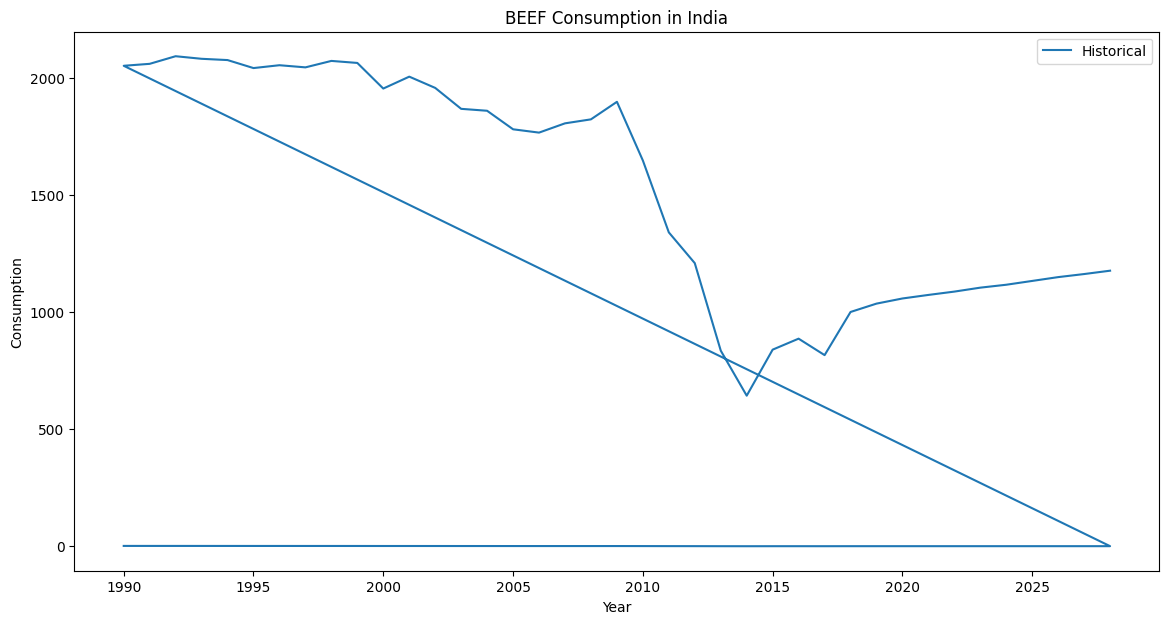

C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

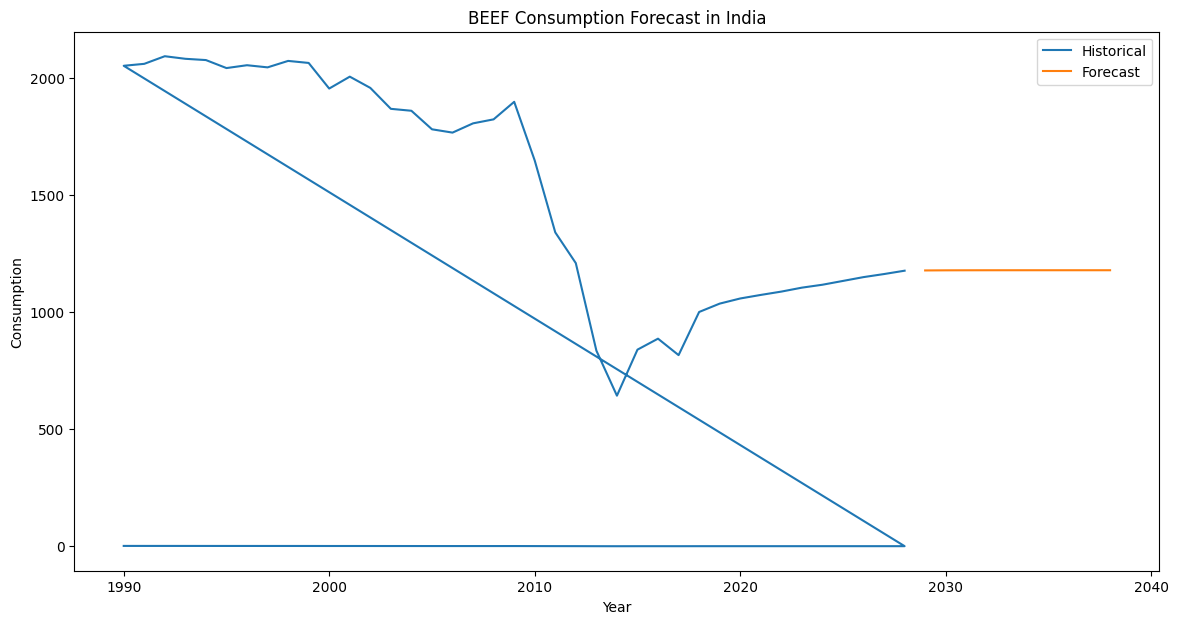

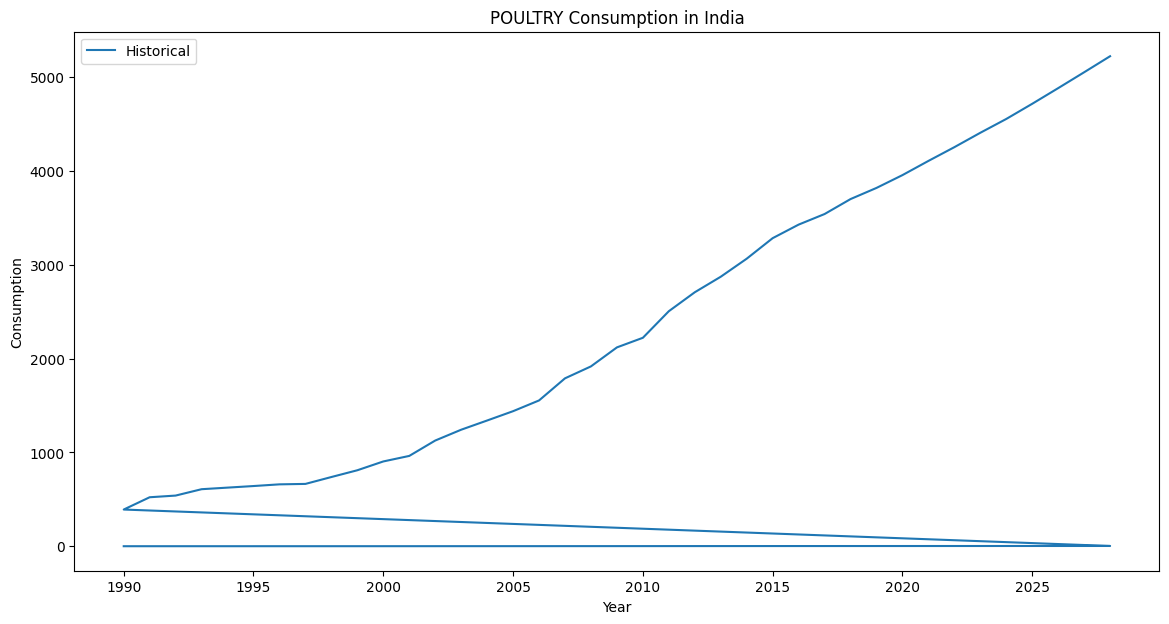

C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

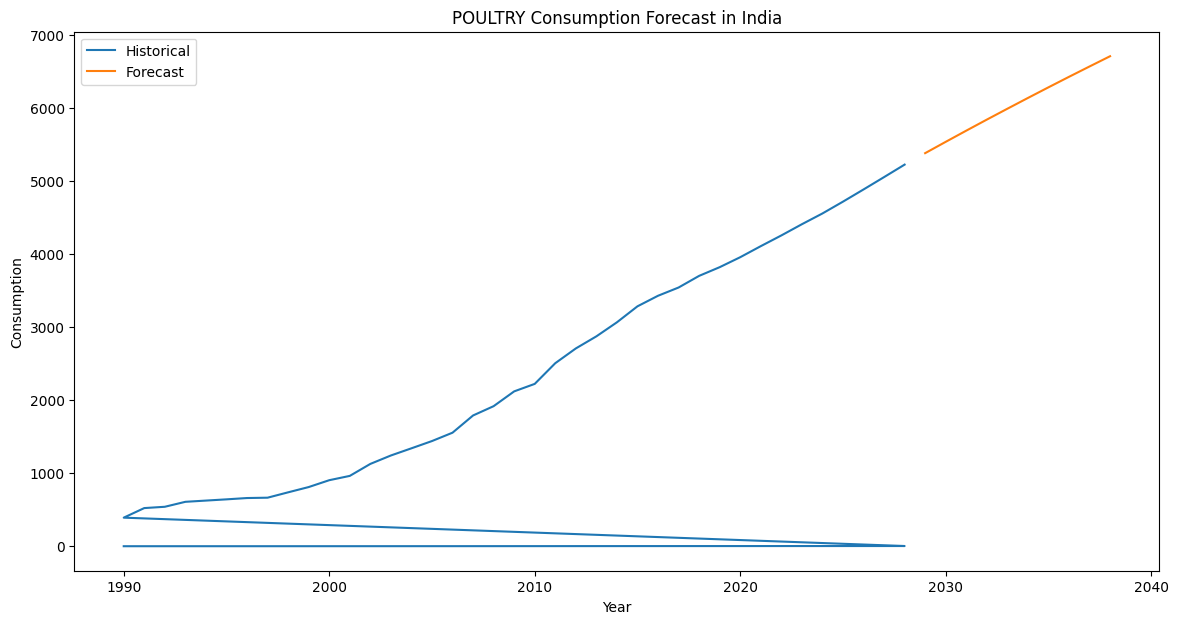

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   78
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -420.766
Date:                Mon, 03 Jun 2024   AIC                            847.531
Time:                        13:43:13   BIC                            854.563
Sample:                             0   HQIC                           850.344
                                 - 78                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9877      0.026     37.417      0.000       0.936       1.039
ma.L1         -0.7020      0.117     -6.001      0.000      -0.931      -0.473
sigma2      3181.3025    134.025     23.737      0.000    2918.619    3443.986
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              2451.88
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):         1224024.11   Skew:                             4.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# Example
forecast_meat_consumption_india('BEEF')
forecast_meat_consumption_india('POULTRY')